In [11]:
# import kagglehub
# rabieelkharoua_students_performance_dataset_path = kagglehub.dataset_download('rabieelkharoua/students-performance-dataset')

# from google.colab import files
# files.upload()  # This will prompt you to upload the kaggle.json file

# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

# !kaggle datasets download -d rabieelkharoua/students-performance-dataset/

# !unzip -qq students-performance-dataset.zip


In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. EDA (Exploratory Data Analysis)

## 1.1 Load Dependencies

In [13]:
# Visualization Tool
import seaborn as sns

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV, cross_validate

# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

## 1.2 Explore The Data

In [14]:
# Read in the csv
student_df = pd.read_csv('/content/Student_performance_data _.csv')

# Print out first 5 rows
student_df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [15]:
# Get some statistics
student_df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [16]:
# Is there any null values?
student_df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


No Null Values! :D

In [17]:
# Lets see the dtypes we're working with
student_df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


Theres No String Vals Just Numerical (continuous and discrete)

In [18]:
# # Replace infinite values with NaN in the entire DataFrame
# student_df.replace([float('inf'), -float('inf')], np.nan, inplace=True)

# import numpy as np

# Round Study Time Weekly into Numerical (Discrete)
student_df['StudyTimeWeekly'] = student_df['StudyTimeWeekly'].apply(lambda x : round(x))
student_df['StudyTimeWeekly'].head()

,StudyTimeWeekly
0,20
1,15
2,4
3,10
4,5


In [19]:
# create a new column 'sex_male' (1 if male, 0 if female)
student_df['sex_male'] = student_df['Gender'].apply(lambda x: 1 if x == 0 else 0)

# create a new column 'sex_female' (1 if female, 0 if male)
student_df['sex_female'] = student_df['Gender'].apply(lambda x: 1 if x == 1 else 0)

print(student_df[['Gender', 'sex_male', 'sex_female']].head())

   Gender  sex_male  sex_female
0       1         0           1
1       0         1           0
2       0         1           0
3       1         0           1
4       1         0           1


In [20]:
# df_sub = student_df[['Age', 'sex_male', 'sex_female','Absences', 'StudyTimeWeekly']]
# sns.pairplot(df_sub, hue='GradeClass')

# 2. Select and Engineer Features.

## 2.1 Independent & Dependent variable(s)

Create list of features that will be used. Exclude student ID has that doesn't help me perform better at school.

In [21]:
# Create list of features you will be using. (exclude student ID & GPA)
selected_features = ['Age', 'sex_male', 'sex_female', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Easier way to get list of columns
# student_df.columns

In [22]:
# Define our 'X' and 'y'
X = student_df[selected_features] # independent variables
y = student_df['GradeClass'] # dependent variable

## 2.2 Train Test Split

* for now lets try 70:30 (train:test)

In [23]:
# Split our data into training and testing sets. 70:30 -> (train:test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Length of our Training data:', X_train.shape,
      '\nLength of our Testing data:', y_test.shape)

Length of our Training data: (1674, 12) 
Length of our Testing data: (718,)


## 2.3 Find the best parameters to train RandomForestClassifier!

In [24]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10, 20],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


- Ok now that we have our best parameters lets train, build, and evauluate our Model!

# 3. Create RandomForestClassifier Model!

## 3.1 B.T.E. (Build Train Evaluate)


In [25]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW.

model = grid_search.best_estimator_

y_pred = model.predict(X_test)

# evaluate and print our model scores using accuracy, precision, recall, f1 scores.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

Accuracy Score: 0.714485
Precision Score: 0.706052
Recall Score: 0.714485
F1 Score: 0.692865


,0
Absences,0.531561
StudyTimeWeekly,0.124716
ParentalSupport,0.072452
ParentalEducation,0.056419
Age,0.051228
Tutoring,0.031748
Sports,0.029828
Extracurricular,0.029419
Music,0.022462
Volunteering,0.018552


## Now this might look bad but we have to remember the following:
* issue is without GPA our model predicts pretty low :(
* but we want to see what will give the student the most advantage beside their current GPA.

## 3.2 What is the most important feature for determining how well you will perform?

In [26]:
feature_imp.idxmax()

'Absences'

* previously if we were to use GPA in our datset it would be the most important feature we use but now we can say that absences plays the most important role.

* which makes sense if you miss school a lot.

## 3.3 Grab Classification Report

In [27]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.12      0.21        33
         1.0       0.51      0.50      0.50        80
         2.0       0.52      0.59      0.55       121
         3.0       0.60      0.41      0.49       127
         4.0       0.84      0.97      0.90       357

    accuracy                           0.71       718
   macro avg       0.65      0.52      0.53       718
weighted avg       0.71      0.71      0.69       718



* These reports look rough but we are looking for what it will predict with such scores without relying on GPA.

# 4. Cross Validation & Visualization!

## 4.1 Does our model overfit?

* Here lets use cross validation to see how well our model is doing behind the scenes with train data & test data.

In [28]:
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),  # multiclass = weighted
    "recall": make_scorer(recall_score, average='weighted')      # multiclass = weighted
}

cv_results = cross_validate(
    estimator=model,
    X=X_train,    #
    y=y_train,
    scoring=scoring,
    return_train_score=True,
    cv=10
)

# Accessing the results
print(cv_results['train_accuracy'])  # Training accuracy for each fold
print(cv_results['test_accuracy'])   # Test accuracy for each fold
print(cv_results['train_precision']) # Training precision for each fold
print(cv_results['test_precision'])  # Test precision for each fold
print(cv_results['train_recall'])    # Training recall for each fold
print(cv_results['test_recall'])     # Test recall for each fold

[0.9309429  0.93227092 0.92363878 0.92563081 0.9270073  0.92899801
 0.92634373 0.93098872 0.9270073  0.92501659]
[0.69047619 0.73214286 0.7202381  0.73809524 0.71856287 0.7245509
 0.70658683 0.68263473 0.71856287 0.73053892]
[0.93278099 0.9341673  0.92661995 0.92784878 0.92929686 0.93127319
 0.92809337 0.93246896 0.9289647  0.92644545]
[0.65122818 0.72867244 0.70791864 0.74063103 0.68798939 0.72658596
 0.70117758 0.63346239 0.7235308  0.72343834]
[0.9309429  0.93227092 0.92363878 0.92563081 0.9270073  0.92899801
 0.92634373 0.93098872 0.9270073  0.92501659]
[0.69047619 0.73214286 0.7202381  0.73809524 0.71856287 0.7245509
 0.70658683 0.68263473 0.71856287 0.73053892]


* The model over fits a lot on the training data but the test isnt awful its just the distance in values is pretty grand.

* Lets visualize it to get a better look at how much of a difference there is?

## 4.2 Visualize The Overfit of Doom!

<ipython-input-30-83664eda44b4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Accuracy', data=scores_df, palette="Set1")


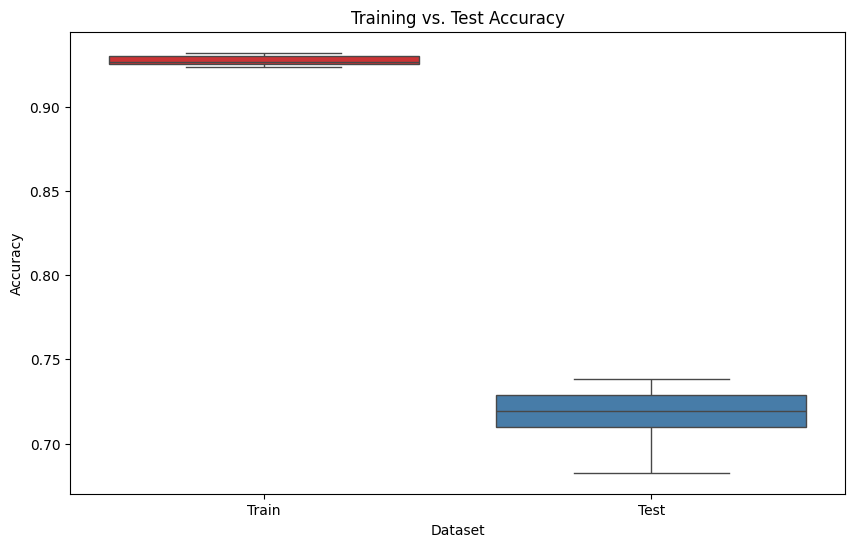

<ipython-input-30-83664eda44b4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Precision', data=scores_df, palette="Set1")


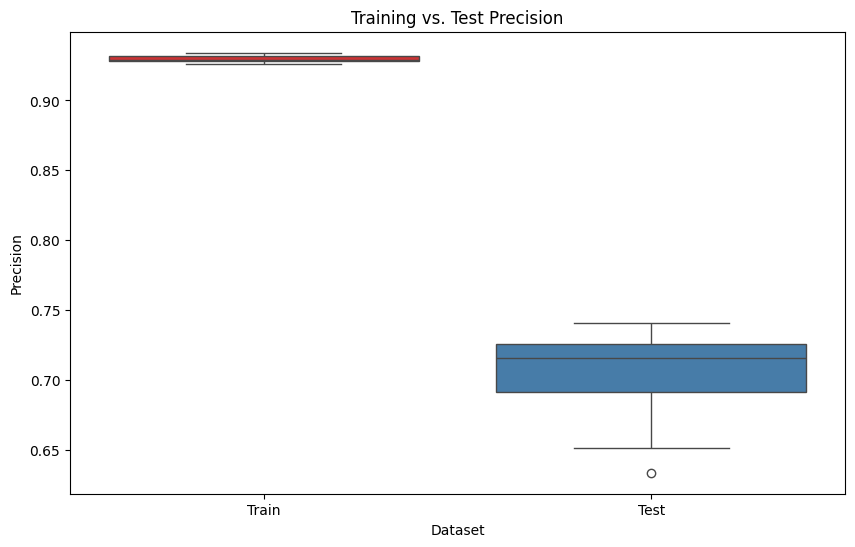

<ipython-input-30-83664eda44b4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Recall', data=scores_df, palette="Set1")


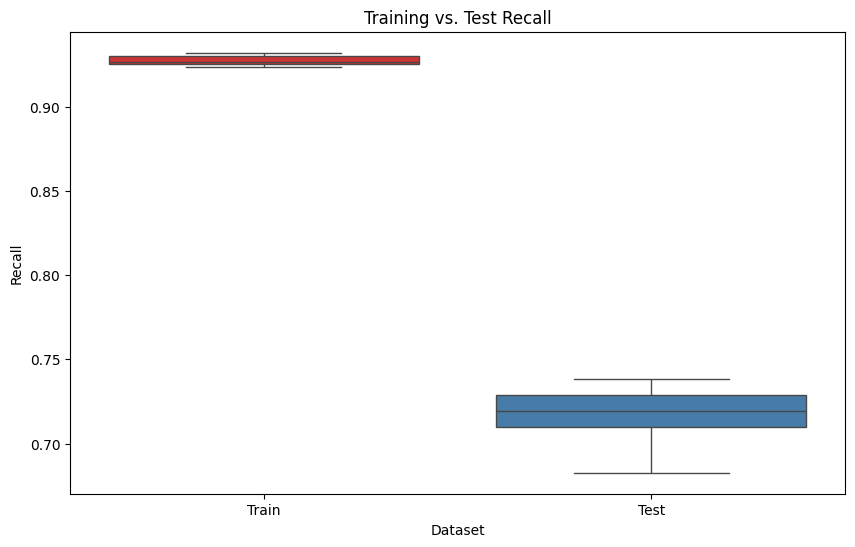

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# extract the scores from cv_results
train_accuracy = cv_results['train_accuracy']
test_accuracy = cv_results['test_accuracy']
train_precision = cv_results['train_precision']
test_precision = cv_results['test_precision']
train_recall = cv_results['train_recall']
test_recall = cv_results['test_recall']

# create a DataFrame for plotting
scores_df = pd.DataFrame({
    'Accuracy': np.concatenate([train_accuracy, test_accuracy]),
    'Precision': np.concatenate([train_precision, test_precision]),
    'Recall': np.concatenate([train_recall, test_recall]),
    'Dataset': ['Train'] * len(train_accuracy) + ['Test'] * len(test_accuracy)
})

# create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='Accuracy', data=scores_df, palette="Set1")
plt.title('Training vs. Test Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='Precision', data=scores_df, palette="Set1")
plt.title('Training vs. Test Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='Recall', data=scores_df, palette="Set1")
plt.title('Training vs. Test Recall')
plt.show()

* And as we can see the difference is quite large between the two but the show must go on!

# 5. Let's Predict!

* Create your featres dataframe
* Use model to predict

* USE THIS AS REFRENCE:

GradeClass: Classification of students' grades based on GPA:

* 0: 'A' (GPA >= 3.5)
* 1: 'B' (3.0 <= GPA < 3.5)
* 2: 'C' (2.5 <= GPA < 3.0)
* 3: 'D' (2.0 <= GPA < 2.5)
* 4: 'F' (GPA < 2.0)


## 5.1 What are our features?

In [34]:
X.columns

Index(['Age', 'sex_male', 'sex_female', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

## 5.2 Create Features dataframe

* 16 years
* Male
* Parente Edu: Higher than Bachelors
* Studying 10 hours a week
* I have been absent 5 times
* Does Tutoring
* Parental Support: Very High
* No Extracurricular Activities
* I play sports tho
* I love music
* I have not volunteered

In [35]:
Fake_Data = pd.DataFrame([[16, 1, 0, 4, 10, 5, 1, 4, 0, 1, 1, 0]], columns=X.columns)

# Make sure shapes match
print(Fake_Data.shape)
print(X.shape)

(1, 12)
(2392, 12)


* Shapes indeed Match :)

## 5.3 Are we a good noodle in school?

In [37]:
# Use model to predict grade class
prediction = model.predict(Fake_Data)

# print prediction
print(prediction[0])

1.0


* So this student is a B student and that is not bad at all for the prediction it makes sense for his stats!

* But what if he missed a bunch of days in school?

## 5.4 Are we a bad noodle in school?

In [41]:
model.predict(pd.DataFrame([[16, 1, 0, 4, 10, 100, 1, 4, 0, 1, 1, 0]], columns=X.columns))[0]

4.0

* This is indeed a bad noodle. Missing 100 days of school gave him a F. But yea this model seems to be doing the trick so now let's save it and take it to streamlit!

# 6. SAVE MODEL!

In [43]:
# Save Model
import joblib
joblib.dump(model, 'model.pkl')

# Download model
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>